# <font color = green>Bike Sharing Assignment</font>

**Importing important liabraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## <font color = royalblue>Step 1: Reading and understanding the data</font>

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
bike.shape

(730, 16)

In [5]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**visualising the data**

<Figure size 2000x2000 with 0 Axes>

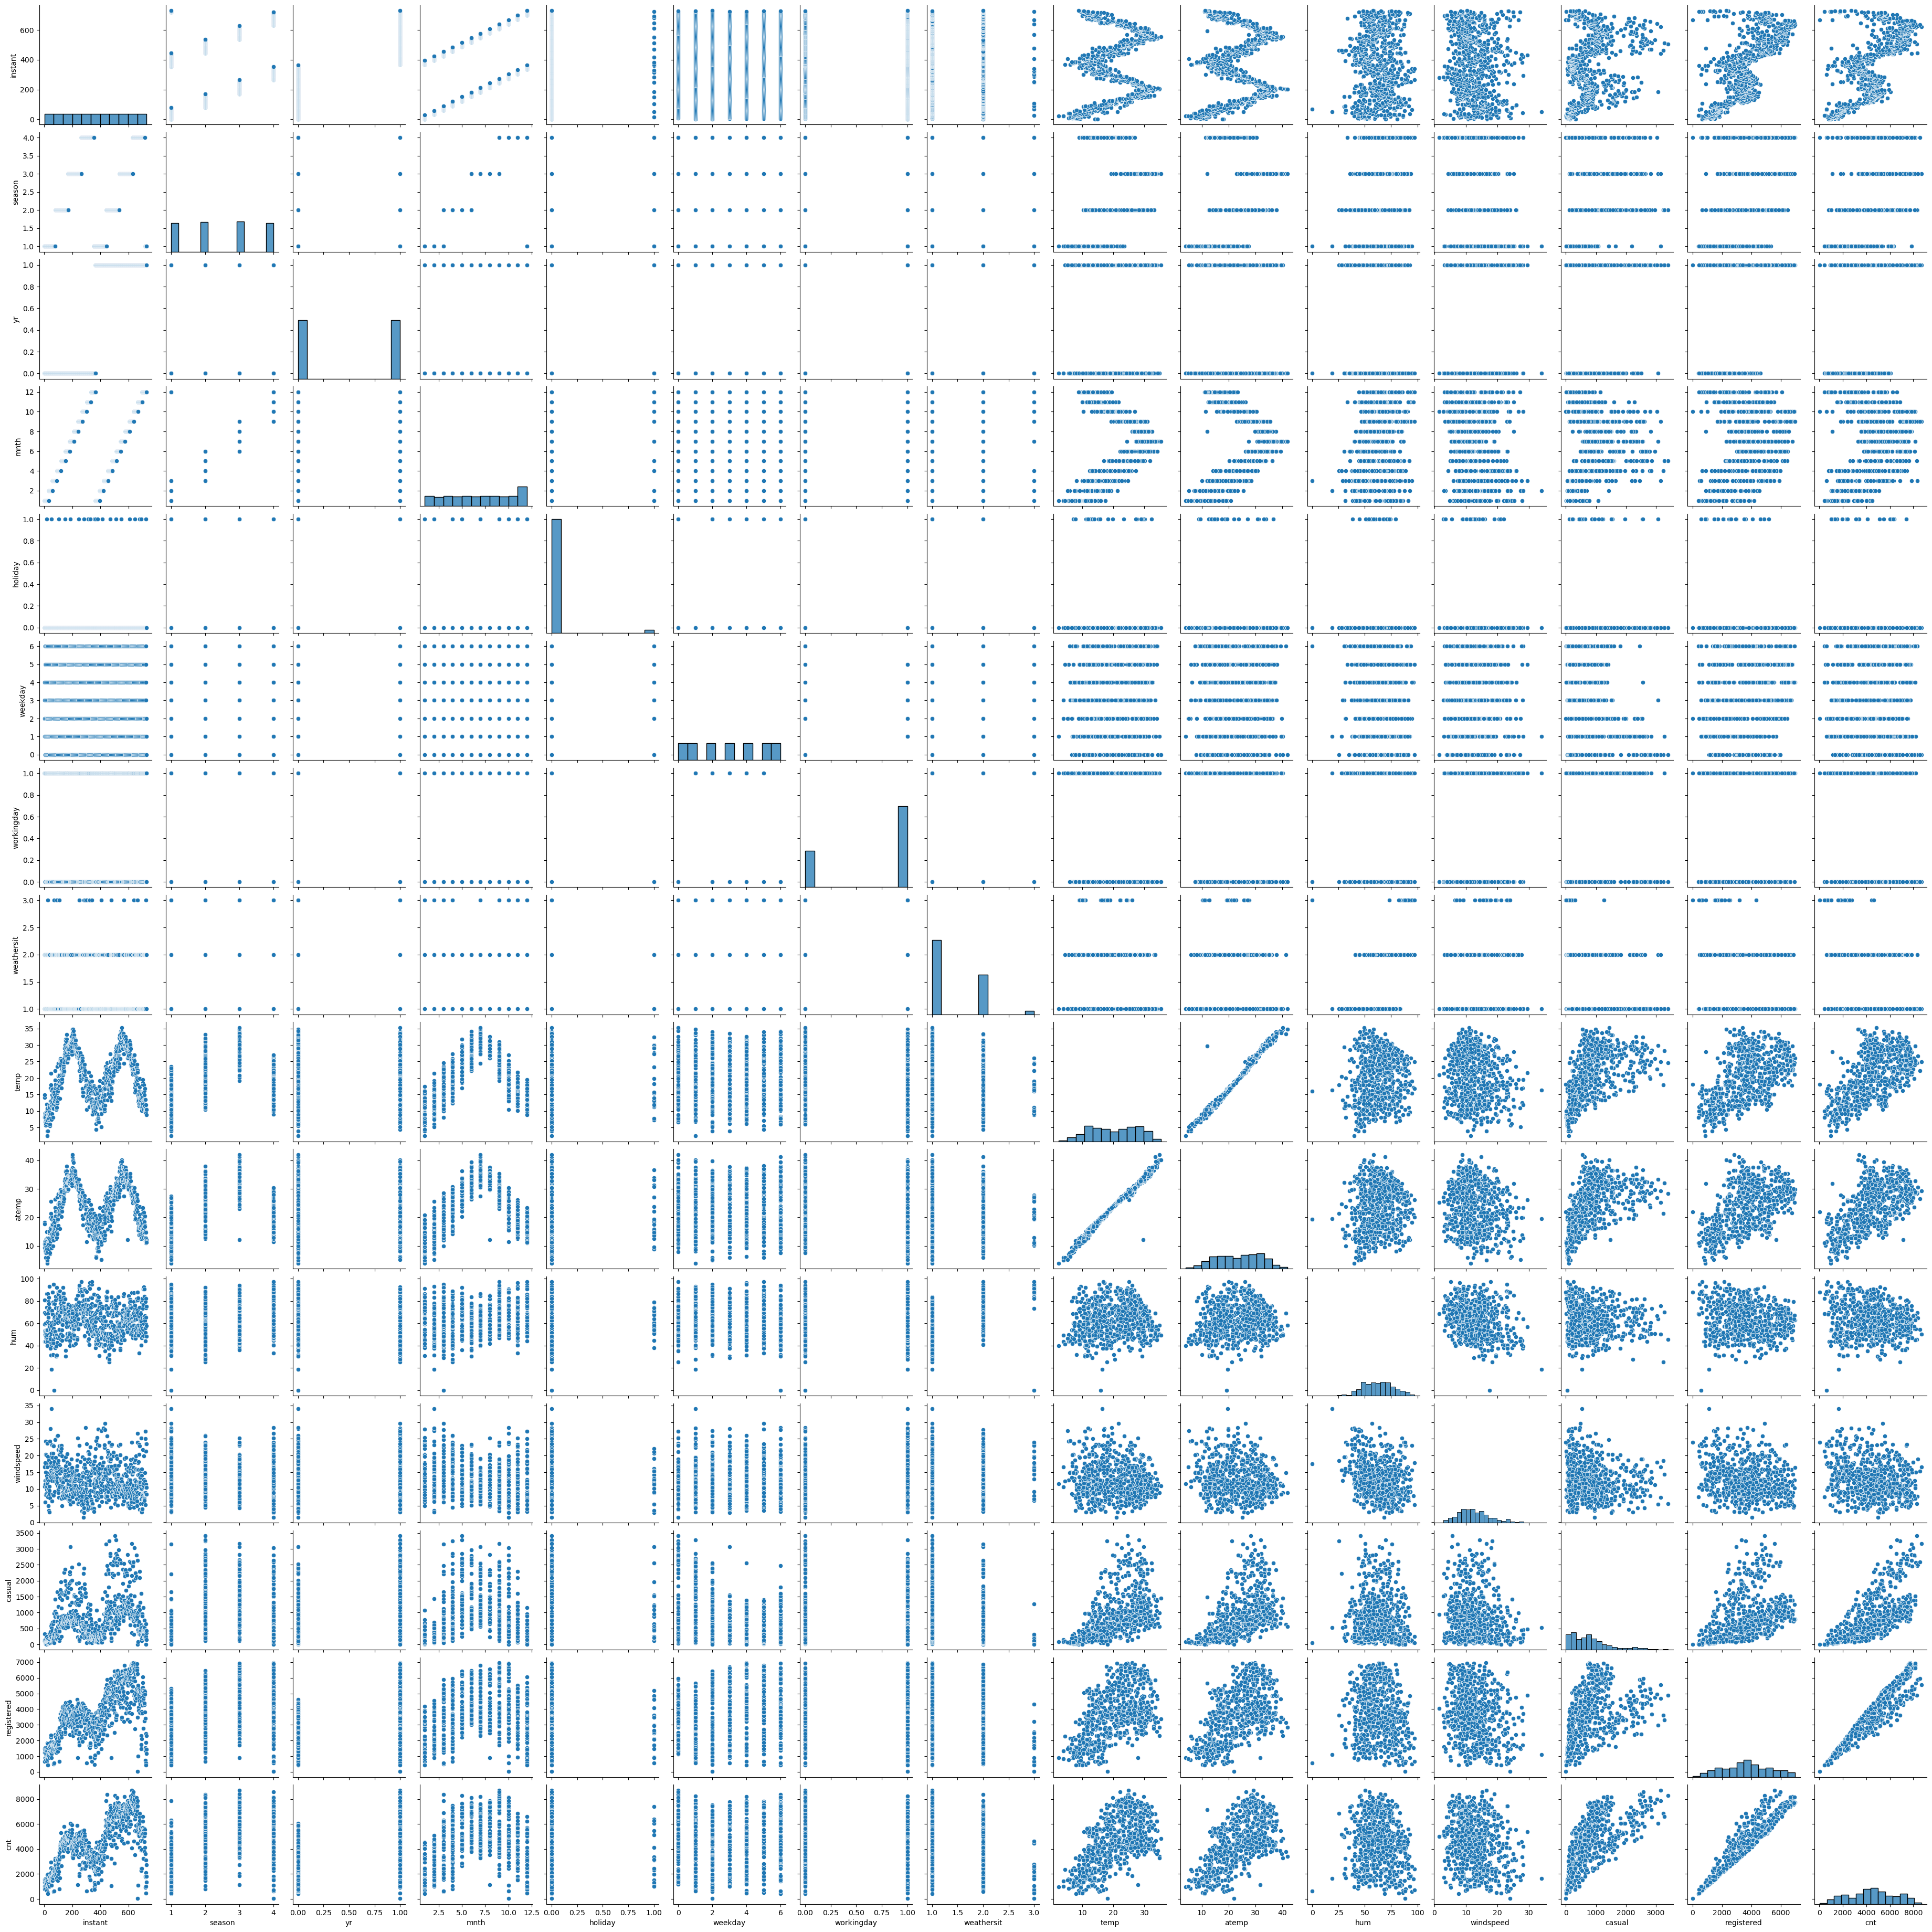

In [7]:
plt.figure(figsize=(20,20))
sns.pairplot(bike)          #numeric data
plt.show()

In [8]:
# now lets see 👀 categorical data

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] 

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

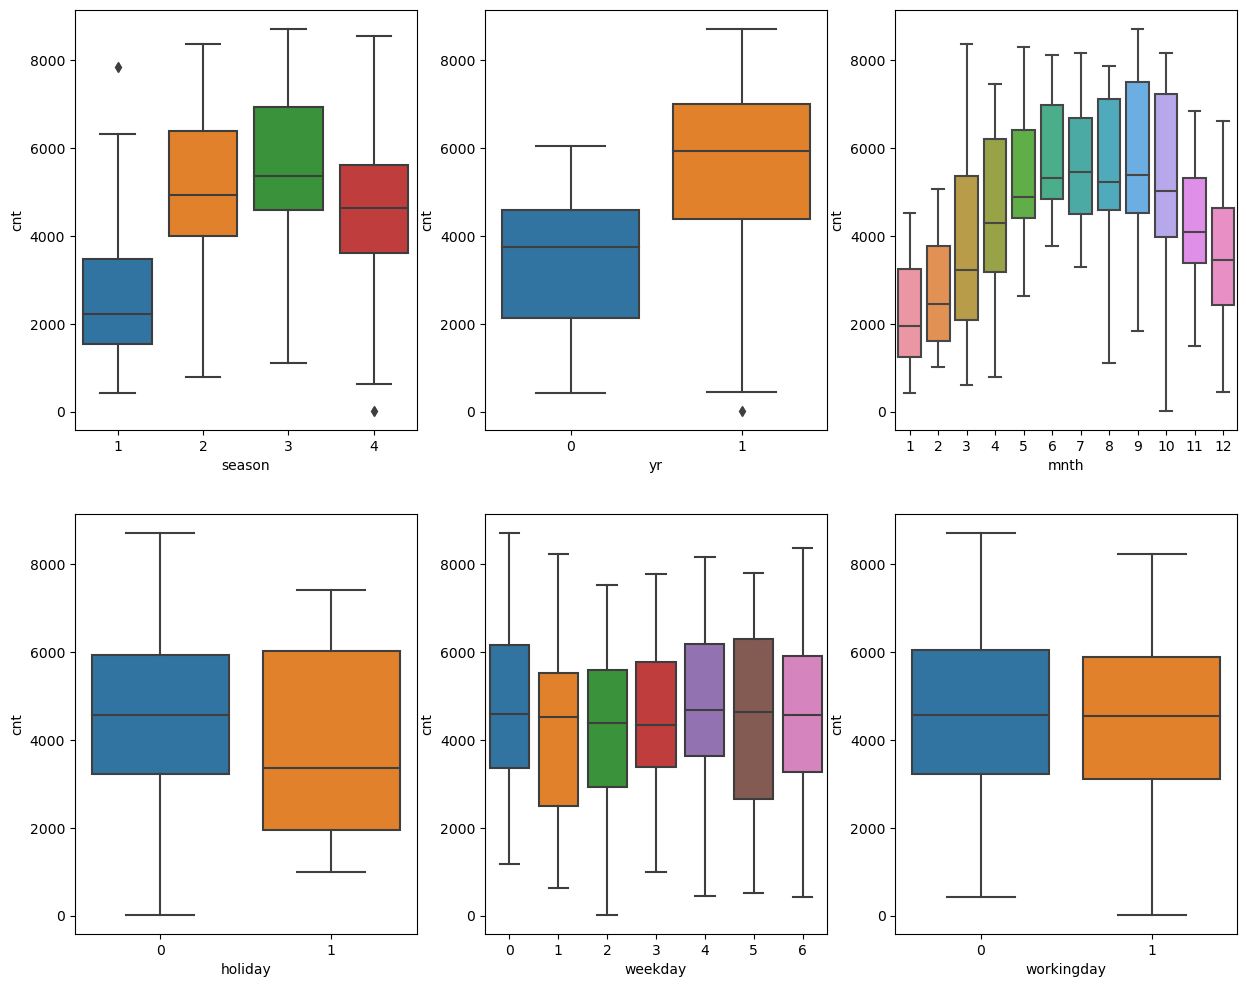

In [9]:
plt.figure(figsize=(15,12))

plt.subplot(2,3,1)
sns.boxplot(data=bike, x='season', y='cnt')

plt.subplot(2,3,2)
sns.boxplot(data=bike, x='yr', y='cnt')

plt.subplot(2,3,3)
sns.boxplot(data=bike, x='mnth', y='cnt')

plt.subplot(2,3,4)
sns.boxplot(data=bike, x='holiday', y='cnt')

plt.subplot(2,3,5)
sns.boxplot(data=bike, x='weekday', y='cnt')

plt.subplot(2,3,6)
sns.boxplot(data=bike, x='workingday', y='cnt')

plt.show()

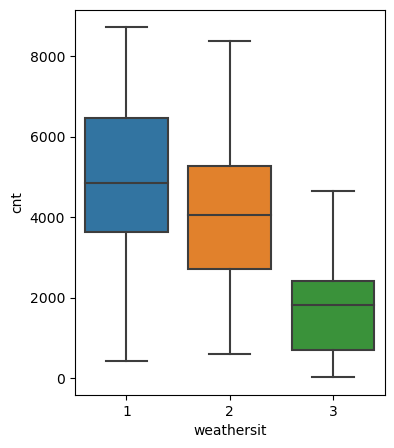

In [10]:
plt.figure(figsize=(4,5))
sns.boxplot(data=bike, x='weathersit', y='cnt')
plt.show()

**conclusion:**
- **season:** season 3 has highest demand of bikes.
- **year:** year I has highest demand.
- **month:** september month has highest demand.
    - demand is started increasing from june.
- **holiday:** when there is no holiday demand is increased and vice-versa.
- **weekday:** Weekday is not clear about demand
- **working day:** there is lesser demand on working day and vice-versa.
- **weathersit:** there is high demand in the begining and it end up decline at the end

## <font color = blue> Step 2: Preparing the data for modelling(train-test split, rescaling etc.)</font>

- Encoding

    - Converting binary vars to 1/0
    - Other categorical vars to dummy vars
- Splitting into train and test

- Rescaling of variables

In [11]:
# lets clean the data
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [12]:
# lets make the data readable

bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                                         7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',
                                               4: 'thu',5: 'fri',6: 'sat'})
bike.head()

instant      dteday  season  yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  spring   0  jan        0     mon           1   
1        2  02-01-2018  spring   0  jan        0     tue           1   
2        3  03-01-2018  spring   0  jan        0     wed           1   
3        4  04-01-2018  spring   0  jan        0     thu           1   
4        5  05-01-2018  spring   0  jan        0     fri           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0   moderate  14.110847  18.18125  80.5833  10.749882     331         654   
1   moderate  14.902598  17.68695  69.6087  16.652113     131         670   
2       good   8.050924   9.47025  43.7273  16.636703     120        1229   
3       good   8.200000  10.60610  59.0435  10.739832     108        1454   
4       good   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [13]:
bike['days'] = (pd.to_datetime(bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [14]:
# Droping instant column as it is index column 
bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns
bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns because we have cnt column which is sum of the both that is the target column

bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

**Dummy variables**

In [15]:
bike = pd.get_dummies(data=bike, columns=["season","mnth","weekday"], drop_first=True, dtype=int)

bike = pd.get_dummies(data=bike,columns=["weathersit"], dtype=int)

In [16]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   days  season_spring  ...  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
0     0              1  ...          0            1            0            0   
1     1              1  ...          0            0            0            0   
2     2              1  ...          0            0            0            0   
3     3              1  ...          0            0            0            0   
4     4              1  ...          0            0            0            0   

   weekday_thu  weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
0            0            0            0               0                0   
1            0            1            0               0                0   
2            0            0            1               0                1   
3            1            0            0               0                1   
4            0            0            0               0                1   

   weathersit_moderate  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0  

[5 rows x 32 columns]

In [17]:
bike.shape

(730, 32)

**Splitting into train and test**

In [18]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)

In [19]:
print(df_test.shape)

(220, 32)


In [20]:
print(df_train.shape)

(510, 32)


### Rescaling the feature
- Normalisation : ($x$ - $x$min) $/$ $x$max - $x$min
- Standardisation : ($x$ - $mu$) $/$ sigma

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [23]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   days  season_spring  season_summer  season_winter  mnth_aug  mnth_dec  \
0     0              1              0              0         0         0   
1     1              1              0              0         0         0   
2     2              1              0              0         0         0   
3     3              1              0              0         0         0   
4     4              1              0              0         0         0   

   mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  mnth_nov  \
0         0         1         0         0         0         0         0   
1         0         1         0         0         0         0         0   
2         0         1         0         0         0         0         0   
3         0         1         0         0         0         0         0   
4         0         1         0         0         0         0         0   

   mnth_oct  mnth_sept  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
0         0          0            1            0            0            0   
1         0          0            0            0            0            0   
2         0          0            0            0            0            0   
3         0          0            0            0            0            1   
4         0          0            0            0            0            0   

   weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
0            0            0               0                0   
1            1            0               0                0   
2            0            1               0                1   
3            0            0               0                1   
4            0            0               0                1   

   weathersit_moderate  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0

In [24]:
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'days']

# 2. fit on data 
# scaler.fit

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed   cnt  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686  7216   
426   1        0           0  0.442393  0.438975  0.640189   0.255342  4066   
728   1        0           1  0.245101  0.200348  0.498067   0.663106  1796   
482   1        0           0  0.395666  0.391735  0.504508   0.188475  4220   
111   0        0           0  0.345824  0.318819  0.751824   0.380981  1683   

         days  season_spring  season_summer  season_winter  mnth_aug  \
576  0.791209              0              0              0         0   
426  0.585165              1              0              0         0   
728  1.000000              1              0              0         0   
482  0.662088              0              1              0         0   
111  0.152473              0              1              0         0   

     mnth_dec  mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  \
576         0         0         0         1         0         0         0   
426         0         0         0         0         0         1         0   
728         1         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   
111         0         0         0         0         0         0         0   

     mnth_nov  mnth_oct  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
576         0         0          0            0            0            0   
426         0         0          0            0            0            1   
728         0         0          0            1            0            0   
482         0         0          0            0            0            1   
111         0         0          0            0            0            1   

     weekday_thu  weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
576            0            0            1               0                1   
426            0            0            0               0                0   
728            0            0            0               0                1   
482            0            0            0               0                0   
111            0            0            0               0                0   

     weathersit_moderate  
576                    0  
426                    1  
728                    0  
482                    1  
111                    1

In [25]:
df_train[num_vars].describe()

temp       atemp         hum   windspeed        days
count  510.000000  510.000000  510.000000  510.000000  510.000000
mean     0.537440    0.513156    0.650480    0.320883    0.505055
std      0.225858    0.212410    0.145846    0.169803    0.287907
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.332086    0.538643    0.199179    0.255838
50%      0.542596    0.529718    0.653714    0.296763    0.510989
75%      0.735215    0.688457    0.754830    0.414447    0.757898
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [26]:
# fit(): learns xmin, xmax
# transform (): 𝑥 - 𝑥min / 𝑥max -  𝑥min
# fit_transform() 

## <font color = dusky> Step 3 : Training the model</font>

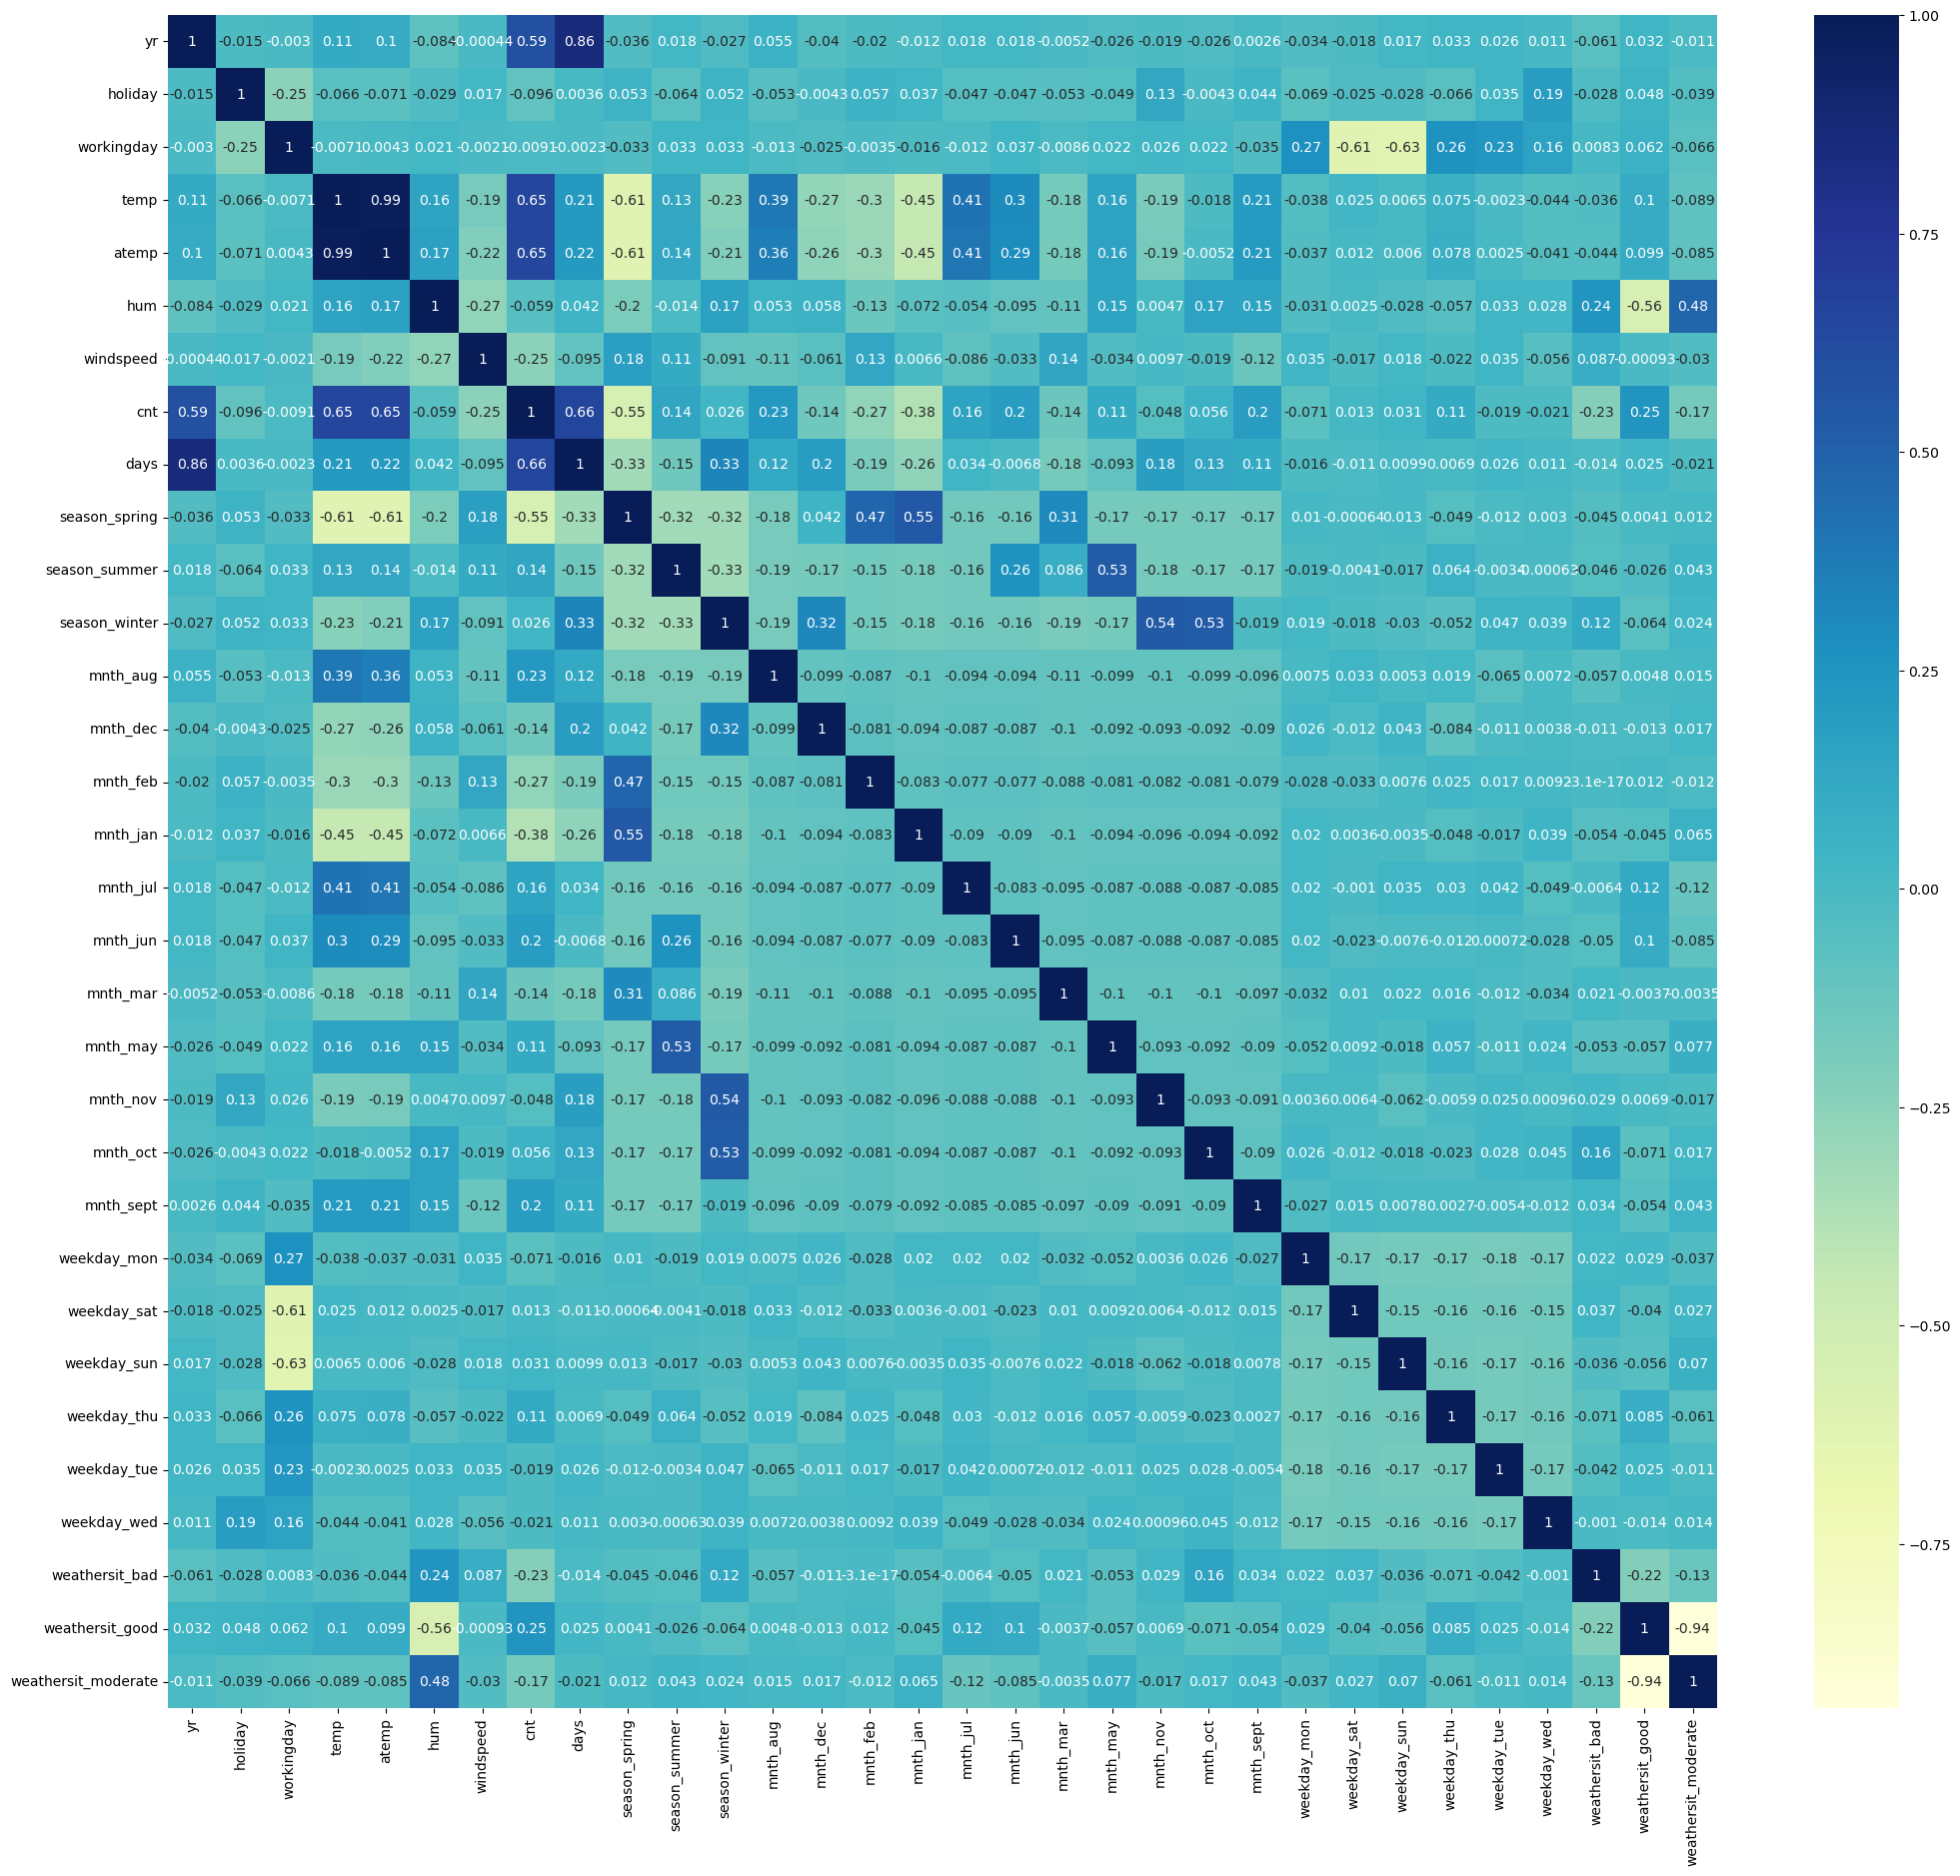

In [27]:
plt.figure(figsize=(25,22))
sns.heatmap(df_train.corr(), annot=True, cmap= 'YlGnBu')
plt.show()

In [28]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed   cnt  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686  7216   
426   1        0           0  0.442393  0.438975  0.640189   0.255342  4066   
728   1        0           1  0.245101  0.200348  0.498067   0.663106  1796   
482   1        0           0  0.395666  0.391735  0.504508   0.188475  4220   
111   0        0           0  0.345824  0.318819  0.751824   0.380981  1683   

         days  season_spring  season_summer  season_winter  mnth_aug  \
576  0.791209              0              0              0         0   
426  0.585165              1              0              0         0   
728  1.000000              1              0              0         0   
482  0.662088              0              1              0         0   
111  0.152473              0              1              0         0   

     mnth_dec  mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  \
576         0         0         0         1         0         0         0   
426         0         0         0         0         0         1         0   
728         1         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   
111         0         0         0         0         0         0         0   

     mnth_nov  mnth_oct  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
576         0         0          0            0            0            0   
426         0         0          0            0            0            1   
728         0         0          0            1            0            0   
482         0         0          0            0            0            1   
111         0         0          0            0            0            1   

     weekday_thu  weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
576            0            0            1               0                1   
426            0            0            0               0                0   
728            0            0            0               0                1   
482            0            0            0               0                0   
111            0            0            0               0                0   

     weathersit_moderate  
576                    0  
426                    1  
728                    0  
482                    1  
111                    1

In [29]:
y_train = df_train.pop('cnt')
x_train = df_train

In [30]:
x_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           0  0.345824  0.318819  0.751824   0.380981   

         days  season_spring  season_summer  season_winter  mnth_aug  \
576  0.791209              0              0              0         0   
426  0.585165              1              0              0         0   
728  1.000000              1              0              0         0   
482  0.662088              0              1              0         0   
111  0.152473              0              1              0         0   

     mnth_dec  mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  \
576         0         0         0         1         0         0         0   
426         0         0         0         0         0         1         0   
728         1         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   
111         0         0         0         0         0         0         0   

     mnth_nov  mnth_oct  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
576         0         0          0            0            0            0   
426         0         0          0            0            0            1   
728         0         0          0            1            0            0   
482         0         0          0            0            0            1   
111         0         0          0            0            0            1   

     weekday_thu  weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
576            0            0            1               0                1   
426            0            0            0               0                0   
728            0            0            0               0                1   
482            0            0            0               0                0   
111            0            0            0               0                0   

     weathersit_moderate  
576                    0  
426                    1  
728                    0  
482                    1  
111                    1

- Statistical significance of variables
- VIF

In [31]:
# add a constant
x_train_sm = sm.add_constant(x_train['temp'])

# create first model
lr = sm.OLS(y_train, x_train_sm)

# fit
lr_model = lr.fit()

# parameters
lr_model.params

const    1491.214309
temp     5571.088025
dtype: float64

In [32]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           2.46e-61
Time:                        13:59:35   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.2143    170.676      8.737      0.000    1155.897    1826.531
temp        5571.0880    292.813     19.026      0.000    4995.815    6146.361
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# add another variables
x_train_sm = x_train[['temp', 'days']]
x_train_sm = sm.add_constant(x_train_sm)

# create model
lr = sm.OLS(y_train, x_train_sm)

# fit
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     588.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          7.64e-133
Time:                        13:59:35   Log-Likelihood:                -4280.9
No. Observations:                 510   AIC:                             8568.
Df Residuals:                     507   BIC:                             8580.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        170.3674    136.823      1.245      0.214     -98.443     439.178
temp        4562.5424    215.520     21.170      0.000    4139.121    4985.964
days        3688.4644    169.071     21.816      0.000    3356.298    4020.631
==============================================================================
Omnibus:                       82.343   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.000
Skew:                          -0.874   Prob(JB):                     3.67e-39
Kurtosis:                       5.297   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Adding All Variables to the Model**

In [34]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [35]:
x_train_sm = sm.add_constant(x_train)

# create model
lr = sm.OLS(y_train, x_train_sm)

# fit
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     90.67
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.15e-176
Time:                        13:59:35   Log-Likelihood:                -4102.7
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     479   BIC:                             8399.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1998.4803    634.396      3.150      0.002     751.938    3245.023
yr                   2492.3579   1441.179      1.729      0.084    -339.455    5324.171
holiday             -1168.2708    569.979     -2.050      0.041   -2288.239     -48.302
workingday           -523.2814    619.569     -0.845      0.399   -1740.691     694.128
temp                 3383.5334   1249.345      2.708      0.007     928.659    5838.408
atemp                 454.6326   1214.579      0.374      0.708   -1931.929    2841.195
hum                 -1364.3819    339.904     -4.014      0.000   -2032.269    -696.495
windspeed           -1564.6962    232.367     -6.734      0.000   -2021.280   -1108.112
days                 -961.9280   2869.084     -0.335      0.738   -6599.474    4675.617
season_spring        -360.4655    264.074     -1.365      0.173    -879.351     158.420
season_summer         399.0276    230.053      1.735      0.083     -53.011     851.066
season_winter         968.7794    246.378      3.932      0.000     484.663    1452.895
mnth_aug              415.6199    570.251      0.729      0.466    -704.882    1536.122
mnth_dec              -58.9356   1019.500     -0.058      0.954   -2062.181    1944.310
mnth_feb             -398.4368    364.924     -1.092      0.275   -1115.486     318.613
mnth_jan             -669.7217    448.718     -1.493      0.136   -1551.421     211.978
mnth_jul             -116.1742    476.613     -0.244      0.808   -1052.685     820.337
mnth_jun              166.4673    328.970      0.506      0.613    -479.935     812.870
mnth_mar              -28.5452    243.196     -0.117      0.907    -506.408     449.318
mnth_may              260.5606    218.447      1.193      0.234    -168.672     689.793
mnth_nov              -54.0767    921.132     -0.059      0.953   -1864.035    1755.882
mnth_oct              301.4158    813.101      0.371      0.711   -1296.269    1899.101
mnth_sept             998.5255    666.484      1.498      0.135    -311.068    2308.119
weekday_mon          -215.1213    127.135     -1.692      0.091    -464.933      34.690
weekday_sat          -481.4278    624.330     -0.771      0.441   -1708.192     745.336
weekday_sun          -430.9437    623.619     -0.691      0.490   -1656.312     794.424
weekday_thu            37.1494    130.462      0.285      0.776    -219.199     293.498
weekday_tue          -227.1260    127.979     -1.775      0.077    -478.596      24.344
weekday_wed           -88.2383    133.061     -0.663      0.508    -349.694     173.217
weathersit_bad       -611.5791    271.498     -2.253      0.025   -1145.053     -78.105
weathersit_good      1557.8084    219.753      7.089      0.000    1126.010    1989.607
weathersit_moderate  1052.2509    221.751      4.745      0.000     616.526    1487.976
===

**VIF**

In [36]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features     VIF
7                  days  573.66
0                    yr  437.31
29      weathersit_good  371.03
30  weathersit_moderate  207.40
12             mnth_dec   67.60
3                  temp   66.94
2            workingday   66.34
19             mnth_nov   56.35
4                 atemp   55.96
20             mnth_oct   43.00
24          weekday_sun   38.79
23          weekday_sat   36.99
21            mnth_sept   27.66
11             mnth_aug   23.79
28       weathersit_bad   18.98
14             mnth_jan   13.65
15             mnth_jul   13.51
8         season_spring   10.81
10        season_winter    9.51
9         season_summer    8.29
13             mnth_feb    6.98
1               holiday    6.80
16             mnth_jun    6.44
17             mnth_mar    4.41
18             mnth_may    3.10
5                   hum    2.07
26          weekday_tue    1.79
22          weekday_mon    1.78
25          weekday_thu    1.76
27          weekday_wed    1.74
6             windspeed    1.31

we could have :
- high p-value, high vif
- high-low:
    - high p, low vif : remove these first
    - low p, high vif : remove these after the ones above 
- low p and low vif (DON'T REMOVE THEM)

In [40]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   days  season_spring  season_summer  season_winter  mnth_aug  mnth_dec  \
0     0              1              0              0         0         0   
1     1              1              0              0         0         0   
2     2              1              0              0         0         0   
3     3              1              0              0         0         0   
4     4              1              0              0         0         0   

   mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  mnth_nov  \
0         0         1         0         0         0         0         0   
1         0         1         0         0         0         0         0   
2         0         1         0         0         0         0         0   
3         0         1         0         0         0         0         0   
4         0         1         0         0         0         0         0   

   mnth_oct  mnth_sept  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
0         0          0            1            0            0            0   
1         0          0            0            0            0            0   
2         0          0            0            0            0            0   
3         0          0            0            0            0            1   
4         0          0            0            0            0            0   

   weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
0            0            0               0                0   
1            1            0               0                0   
2            0            1               0                1   
3            0            0               0                1   
4            0            0               0                1   

   weathersit_moderate  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0

## Build a Model using RFE and Automated approach

In [44]:
# Importing library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,step=15)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [51]:
#Columns selected by RFE and their weights
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days', True, 1),
 ('season_spring', False, 3),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 3),
 ('mnth_jun', False, 3),
 ('mnth_mar', False, 3),
 ('mnth_may', False, 3),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 3),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 3),
 ('weekday_tue', False, 3),
 ('weekday_wed', False, 3),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

**Vif**

In [52]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [53]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'days', 'season_winter', 'mnth_jan', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [55]:
# Taking 15 columns supported by RFE for regression
x_train_rfe = x_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [57]:
x_train_rfe.shape

(510, 15)

# now Starting with all variables selected by RFE

In [60]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train, x_train_sm).fit()
    print(lm.summary())
    return lm

In [61]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [63]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.67e-188
Time:                        14:12:43   Log-Likelihood:                -4112.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2730.3983    

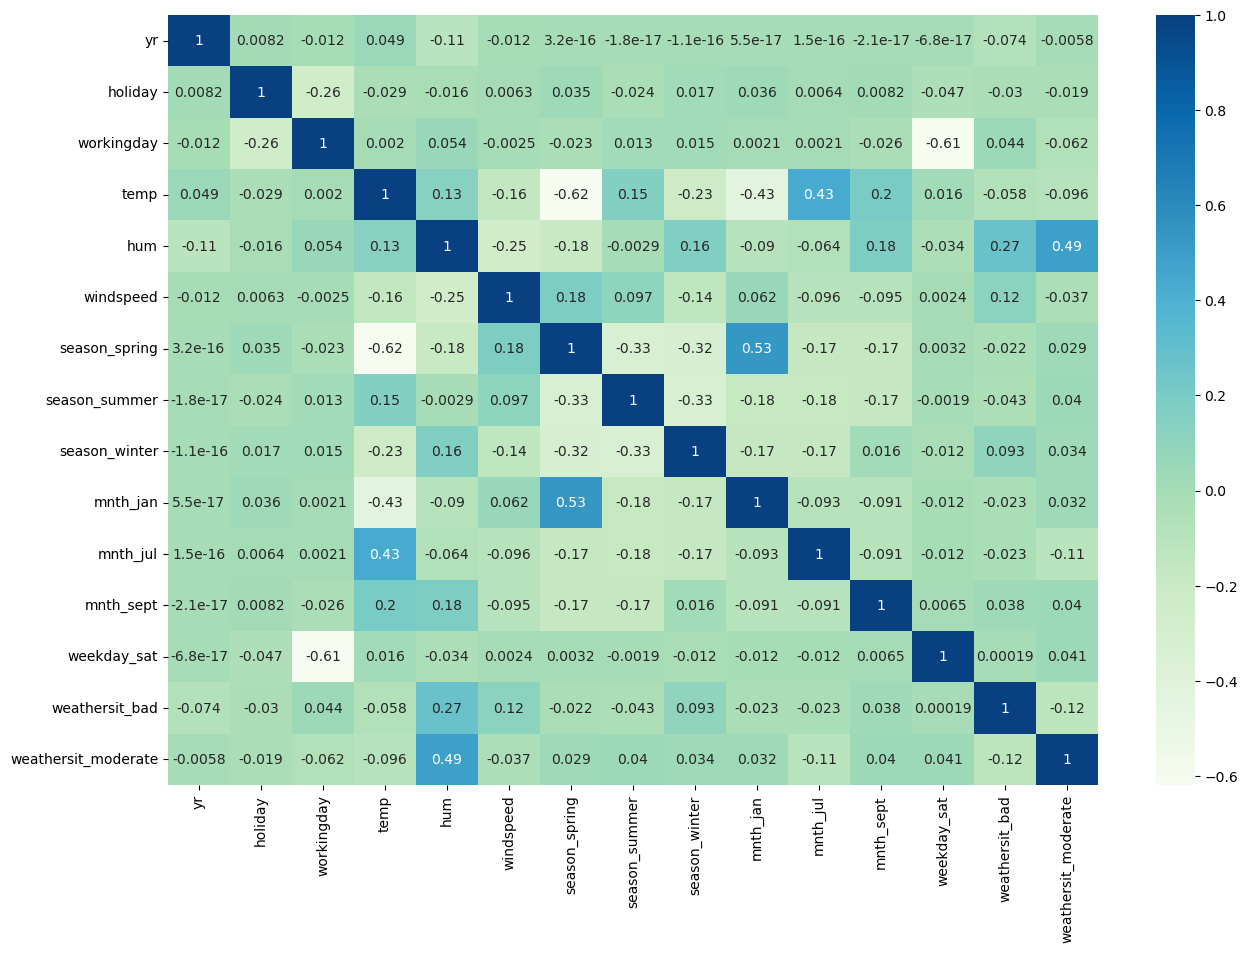

In [65]:
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

In [66]:
# another model

# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          6.85e-189
Time:                        19:35:22   Log-Likelihood:                -4114.2
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8322.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2632.4781    

In [67]:
# checking VIF

In [68]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          6.59e-186
Time:                        19:36:16   Log-Likelihood:                -4124.0
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     496   BIC:                             8335.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1935.2802    

In [69]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          6.83e-183
Time:                        19:36:53   Log-Likelihood:                -4136.8
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     498   BIC:                             8348.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1708.4853    

In [70]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     157.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          3.47e-147
Time:                        19:37:04   Log-Likelihood:                -4224.0
No. Observations:                 510   AIC:                             8470.
Df Residuals:                     499   BIC:                             8517.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5073.6733    

**Trying to replace July with spring as both were highly correlated**

In [71]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     76.48
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           4.59e-94
Time:                        19:38:03   Log-Likelihood:                -4349.9
No. Observations:                 510   AIC:                             8722.
Df Residuals:                     499   BIC:                             8768.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3659.6687    

**Removing windspeed with spring as windspeed was highly correlated with temp**


In [72]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     144.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.69e-140
Time:                        19:39:19   Log-Likelihood:                -4239.8
No. Observations:                 510   AIC:                             8502.
Df Residuals:                     499   BIC:                             8548.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4690.8835    

**add temp and remove season_summer and workingday**

In [73]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.22e-178
Time:                        19:40:39   Log-Likelihood:                -4152.5
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     500   BIC:                             8367.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1676.2814    

**using the weekend `Sunday` which was dropped during RFE instead of `Saturday`**

In [74]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     144.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.95e-140
Time:                        19:41:45   Log-Likelihood:                -4239.9
No. Observations:                 510   AIC:                             8502.
Df Residuals:                     499   BIC:                             8548.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4705.9495    

# <font color = teal>Step 4 : Residual Analysis</font>

In [78]:
y_train_pred = lr_model.predict(x_train_sm)

In [79]:
res = y_train - y_train_pred

<Axes: ylabel='Density'>

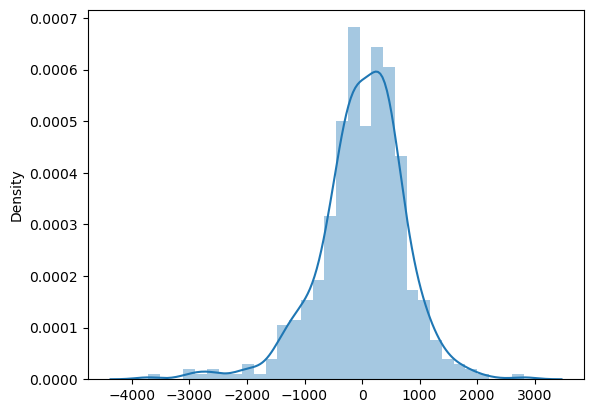

In [80]:
sns.distplot(res)

# <font color = green>Step 5 : Predictions and evaluation on the test set</font> 

In [83]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days']

# 2. fit on data 
# scaler.fit


df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed   cnt  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219  6043   
535   1        0           1  0.901354  0.842587  0.610133   0.153728  6211   
299   0        0           0  0.511964  0.496145  0.837699   0.334206  2659   
221   0        0           1  0.881625  0.795343  0.437098   0.339570  4780   
152   0        0           0  0.817246  0.741471  0.314298   0.537414  4968   

         days  season_spring  season_summer  season_winter  mnth_aug  \
184  0.252747              0              0              0         0   
535  0.734890              0              1              0         0   
299  0.410714              0              0              1         0   
221  0.303571              0              0              0         1   
152  0.208791              0              1              0         0   

     mnth_dec  mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  \
184         0         0         0         1         0         0         0   
535         0         0         0         0         1         0         0   
299         0         0         0         0         0         0         0   
221         0         0         0         0         0         0         0   
152         0         0         0         0         1         0         0   

     mnth_nov  mnth_oct  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
184         0         0          0            0            0            0   
535         0         0          0            0            0            0   
299         0         1          0            0            1            0   
221         0         0          0            0            0            0   
152         0         0          0            0            1            0   

     weekday_thu  weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
184            0            0            1               0                0   
535            1            0            0               0                1   
299            0            0            0               0                0   
221            0            0            0               0                1   
152            0            0            0               0                1   

     weathersit_moderate  
184                    1  
535                    0  
299                    1  
221                    0  
152                    0

In [84]:
y_test = df_test.pop('cnt')
x_test = df_test

In [85]:
# add a constant

x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
184    1.0   0        1           0  0.831783  0.769660  0.657364   0.084219   
535    1.0   1        0           1  0.901354  0.842587  0.610133   0.153728   
299    1.0   0        0           0  0.511964  0.496145  0.837699   0.334206   
221    1.0   0        0           1  0.881625  0.795343  0.437098   0.339570   
152    1.0   0        0           0  0.817246  0.741471  0.314298   0.537414   

         days  season_spring  season_summer  season_winter  mnth_aug  \
184  0.252747              0              0              0         0   
535  0.734890              0              1              0         0   
299  0.410714              0              0              1         0   
221  0.303571              0              0              0         1   
152  0.208791              0              1              0         0   

     mnth_dec  mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  \
184         0         0         0         1         0         0         0   
535         0         0         0         0         1         0         0   
299         0         0         0         0         0         0         0   
221         0         0         0         0         0         0         0   
152         0         0         0         0         1         0         0   

     mnth_nov  mnth_oct  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
184         0         0          0            0            0            0   
535         0         0          0            0            0            0   
299         0         1          0            0            1            0   
221         0         0          0            0            0            0   
152         0         0          0            0            1            0   

     weekday_thu  weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
184            0            0            1               0                0   
535            1            0            0               0                1   
299            0            0            0               0                0   
221            0            0            0               0                1   
152            0            0            0               0                1   

     weathersit_moderate  
184                    1  
535                    0  
299                    1  
221                    0  
152                    0

In [87]:
# predict
y_test_pred = lr_model.predict(x_test_sm)

In [88]:
# evaluate
from sklearn.metrics import r2_score

In [89]:
r2_score(y_true=y_test, y_pred=y_test_pred
        )

0.8305809155477564

**for  Homoscedacity**

Text(0, 0.5, 'y_test_pred')

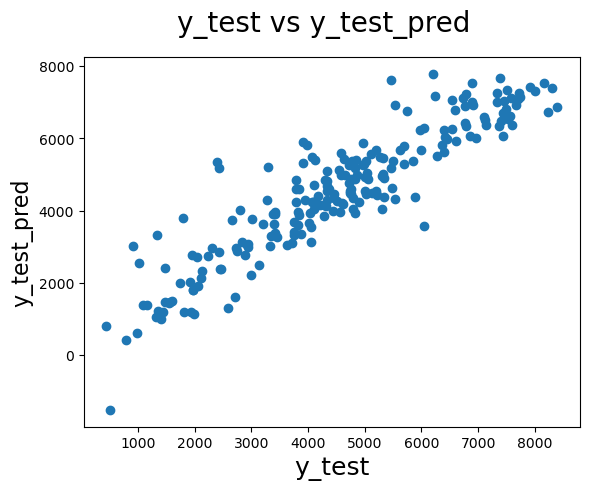

In [90]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

# conclusion
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive   the bikes without having business impact.

👉**Significant variables to predict the demand for shared bikes**

- **holiday**
- **temp**
- **hum**
- **windspeed**
- **Season**
- **months(January, July, September, November, December)**
- **Sunday**
- **weathersit( Light Snow, Mist + Cloudy)**

---